My question is: 
**Is there any single pokemon that is the best against EVERY OTHER kind of pokemon?**  Usually, there is a tradeoff between pokemon types, but is there one pokemon that is good against every type?  Let's find out!

OTHER QUESTIONS:
1. What is the "most unique" ability? (compare the counts of different abilities)
2. Which type of Pokemon generally have the most abilities?
3. Have Pokemon become more complex over time? (base this off of # of abilities, how many columns it's a part of, if it has more than one type, how many different pokemon there are in each generation)
4. Which type of Pokemon is all around the best?  

In other words, should you choose charmander, bulbasaur, or squirtle? 

In [ ]:
#invite all my peeps to the Kaggle party
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#from bokeh.charts import Bar, TimeSeries, output_file, show, output_notebook
#from bokeh.models import HoverTool, ColumnDataSource
#output_notebook()



In [ ]:
pkm = pd.read_csv('../input/pokemon.csv')

In [ ]:
pkm.head()

In [ ]:
#rearrange the pokemon columns into a more categorical order: names, basic stats, abilities, characteristics
#getting rid of the japanese name, base_egg_steps, base_happiness, weight, height, percentage_male
#... don't really need that in this case
pkm =    pkm        [[ #Name
                      'name', 
                      'pokedex_number', 
                      'type1', 
                      'type2', 
                      #Basic Stats
                      'hp', 
                      'attack',
                      'defense',
                      'sp_attack',
                      'sp_defense',
                      'speed', 
                      'base_total', #all the previous stats added together
                      'abilities',
                      #Attributes
                      'generation',
                      'is_legendary',
                      #"Against" attributes
                      'against_bug',
                      'against_dark',
                      'against_dragon',
                      'against_electric',
                      'against_fairy',
                      'against_fight',
                      'against_fire',
                      'against_flying',
                      'against_ghost',
                      'against_grass',
                      'against_ground',
                      'against_ice',
                      'against_normal',
                      'against_poison',
                      'against_psychic',
                      'against_rock',
                      'against_steel',
                      'against_water']]#.head(151) #we're only counting the Pokemon that really matter.


And now let's take a peak...

In [ ]:
pkm.head()

Okay, these columns look a little more manageable.  Now let's start exploring withe some Seaborn Visualizations!  We'll start with our first question: **Is there any single pokemon that is the best against EVERY OTHER kind of pokemon?**  My first feeling is that we take the average of all the "against" stats and compare.

In [ ]:
pkm['against_average']= (pkm['against_bug']+
                      pkm['against_dark']+
                      pkm['against_dragon']+
                      pkm['against_electric']+
                      pkm['against_fairy']+
                      pkm['against_fight']+
                      pkm['against_fire']+
                      pkm['against_flying']+
                      pkm['against_ghost']+
                      pkm['against_grass']+
                      pkm['against_ground']+
                      pkm['against_ice']+
                      pkm['against_normal']+
                      pkm['against_poison']+
                      pkm['against_psychic']+
                      pkm['against_rock']+
                      pkm['against_steel']+
                      pkm['against_water'])/18

Okie dokie: now let's see who has the highest 'against_average' value!

In [ ]:
against_avg_srt = pkm.sort_values('against_average', ascending = False)
against_avg_srt[['name', 'against_average']].head()

Wait... what?  Amaura and Aurorus? 

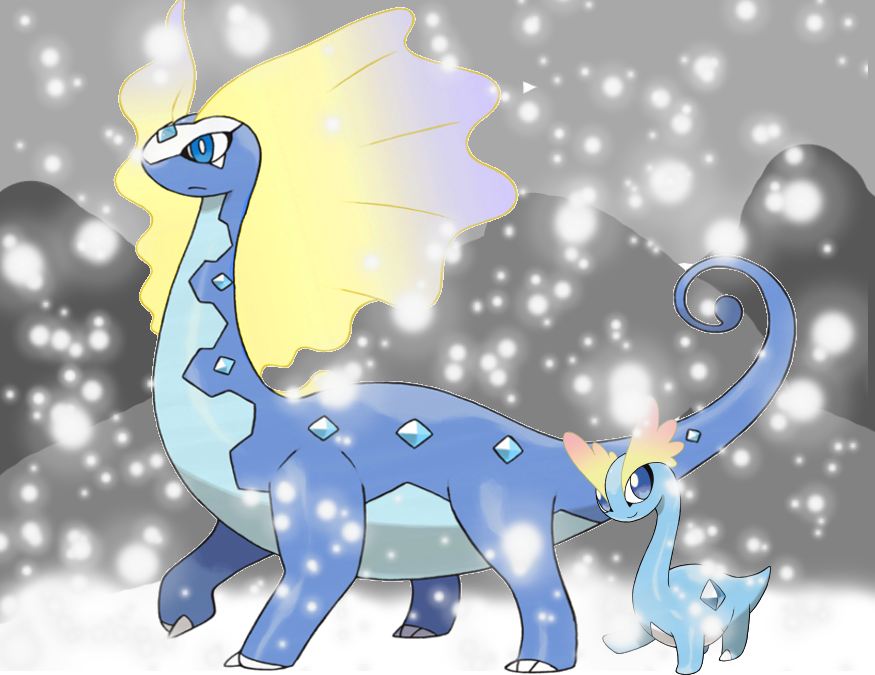
Amaura and Aurorus are the greatest Pokemon? Hmm.. Perhaps we need to rethink the way we decide on this answer.  It may be more correct to say that these two critters are the most **versatile** Pokemon- they can attack well accross the most pokemon types.

Let's do some visualizations and see if we can't get some more answers about why our data looks a little strange.

In [ ]:
#plot using the Seaborn "swarmplot"
sns.swarmplot(x='type1', y='against_average', data=against_avg_srt
           ,dodge=True
           , size=7
           #,fit_reg = False
           ,hue = 'type1'
          )
#rotate the tick marks and move the lengend over
plt.xticks(rotation=-45)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

Cool!  We can see Amara and Aurorus on the top left there.  

By the way, Are those colors driving you crazy?  Let's change them to their proper Pokemon color with the official Bulbapedia codes!

In [ ]:
pkmn_type_colors = ['#B8A038',  # Rock
                    '#78C850',  # Grass
                    '#A8B820',  # Bug
                    '#E0C068',  # Ground
                    '#F85888',  # Psychic
                    '#705848',  # Dark
                    '#98D8D8',  # Ice
                    '#C03028',  # Fighting
                    '#F08030',  # Fire
                    '#7038F8',  # Dragon
                    '#6890F0',  # Water
                    '#A8A878',  # Normal
                    '#A890F0',  # Flying
                    '#A040A0',  # Poison
                    '#B8B8D0',  # Steel
                    '#705898',  # Ghost 
                    '#EE99AC',  # Fairy
                    '#F8D030',  # Electric
                   ]

Now we'll make the background white to make those colors pop, assign our new color pallette, make the circles bigger, and voila!

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,10))
#plt.ylim(0, 1.5)
sns.swarmplot(x='type1', y='against_average', data=against_avg_srt 
              ,palette = pkmn_type_colors
              ,dodge = True
              ,size = 7
           )
plt.xticks(rotation=-45)
#plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);

Once again, it look like we may be getting some fishy conclusions.  It's sorting by the maximum against_averages, but it looks like steel usually is the worst out of all of them when it comes to being good against most Pokemon.  

Perhaps what we need is a different definition of the "best" Pokemon.  Who has the greatest base_totals? 

(we'll just switch out 'against_average' for 'base_total' on the y-axis in the sns.swarmplot function)

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,10))
#plt.ylim(0, 1.5)
sns.swarmplot(x='type1', y='base_total', data=against_avg_srt 
              ,palette = pkmn_type_colors
              ,dodge = True
              ,size = 7
           )
plt.xticks(rotation=-45)
#plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);


Who are those two at the top of dragon and psychic?

In [ ]:
base_total_srt = pkm.sort_values('base_total', ascending = False)
base_total_srt[['name', 'base_total']].head()

Yes!  My man Mewtwo comin' in on top!  (although I did hate him in the Pokemon movie back in the 1st grade :).
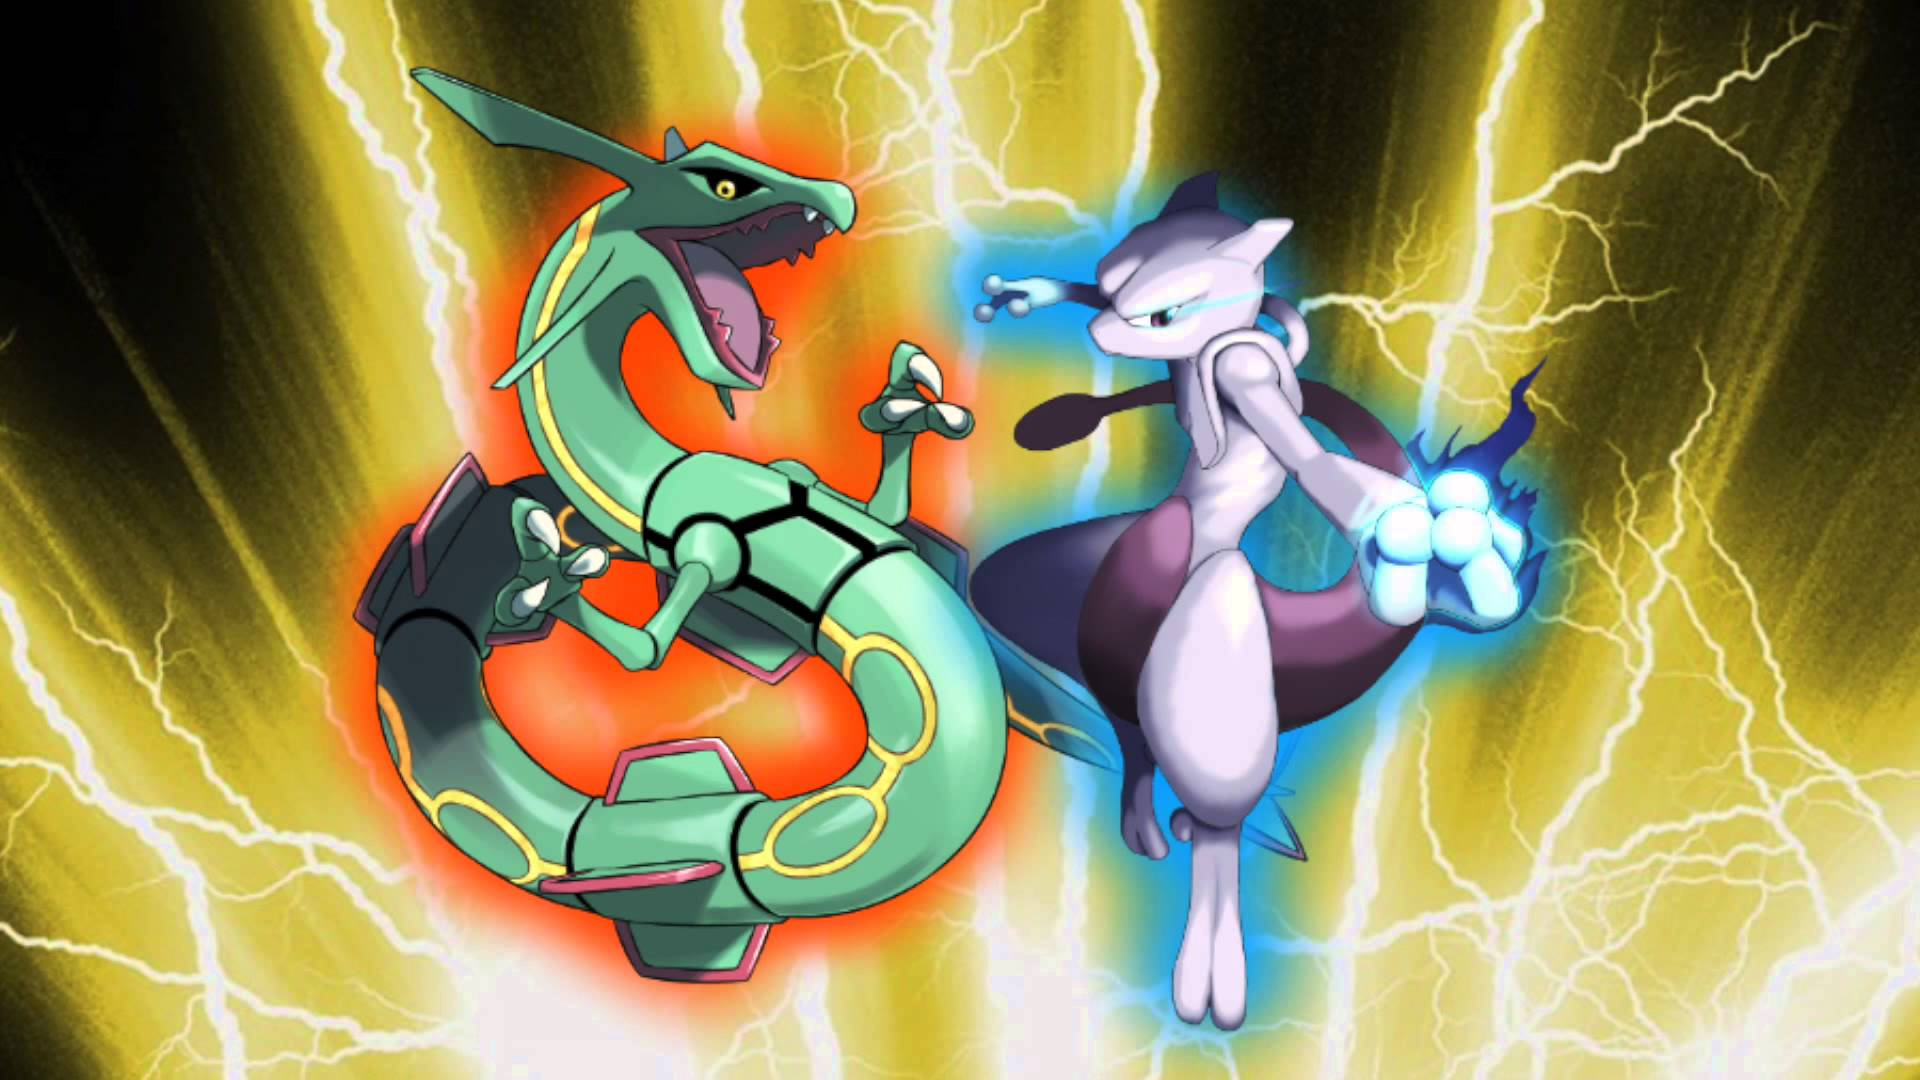

Now that I'm questioning my definition of the BEST Pokemon, I wonder- which Pokemon has the most abilities?  For this question, we'll simplify our dataset again and get rid of all the "against" abilities

In [ ]:
pkm =           pkm[[ #Name
                      'name', 
                      'pokedex_number', 
                      'type1', 
                      'type2', 
                      #Basic Stats
                      'hp', 
                      'attack',
                      'defense',
                      'sp_attack',
                      'sp_defense',
                      'speed', 
                      'base_total', #all the previous stats added together
                      'abilities',
                      #Attributes
                      'generation',
                      'is_legendary'
                    ]]

In [ ]:
pkm['abilities_cnt']= pkm['abilities'].count()

In [ ]:
pkm['abilities_cnt']